In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set()
sns.set_style('whitegrid')

In [46]:
df = pd.read_csv('data/cycles-with-features.csv', header=0).drop(labels='Unnamed: 0', axis=1).drop([1])

### Normalize periodicity
Cycle analysis is easier when the number of points comprising each cycle is fixed. We fill each cycle with $0$ values if necessary.

In [40]:
import math

In [67]:
max_period = math.ceil(df['Period'].max()) # Evaluates to 536.3s -> 537s
for (i, row) in df[df['Min']==1].iterrows():
    rows_to_pad = int((max_period - row['Period'])/0.1)
    val_to_pad = df[df['Cycle'] == i+1].iloc[-1]['Load']
    print(val_to_pad)

#for cycle in range(df['Cycle'].max()):
#    df = pd.concat(df.iloc[])

0.02277


IndexError: single positional indexer is out-of-bounds

### Autocorrelation
__Autocorrelation__ measures how similar cycles look over time. By observing the correlation of cycles for $n$-many lags, where _lag_ refers to how many previous data we choose to observe, we can measure randomness in cycles.

In [12]:
from pandas.plotting import autocorrelation_plot
import itertools

### About the graph
Horizontal lines correspond to $95\%$ and $99\%$ confidence bands; i.e. autocorrelation $\approx 0.55$ for $99\%$ of cycle samples with lag$=1$.

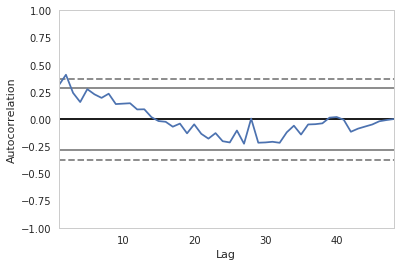

In [13]:
autocorrelation_plot(df[df['Min']==1]['Load'])

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [21]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

### Grid-search for optimal _SARIMAX_ $p, d, q$

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
for param in pdq:
    for c_param in seasonal_pdq:
        try:
            reg = SARIMAX(y, order=param, seasonal_order=c_param, enforce_stationarity=False, enforce_invertibility=False)